In [20]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
csvPath = os.path.expanduser("~/Desktop")
df = pd.read_csv(f"{csvPath}/NBA2017.csv", sep=";")

In [22]:
df = df.drop(df.columns[[0, 2, 3]], axis=1)

In [23]:
# Initialize our output column with zeros. Then specify the categories of stats to loop over. Choose the extra weight for the most important columns.
df["FantasyPoints"] = np.zeros(len(df["PLAYER"]))
categories = ["MIN" , "PTS", "AST", "REB", "BLK", "STL", "TOV", "FG%", "3PM", "FT%"]
ExtraWeight = 2

for categorie in categories:
    if categorie == "MIN":
        i = 0
        tempStore = []
        df = df.sort_values(categorie, ascending=False)

        while i < len(df["PLAYER"]):
            tempStore.append(df.iloc[i,27]+ ExtraWeight * len(df["PLAYER"]) - ExtraWeight * i)
            i += 1

        df["FantasyPoints"] = tempStore
        tempStore.clear()
    else:
        i = 0
        tempStore = []
        df = df.sort_values(categorie, ascending=False)

        while i < len(df["PLAYER"]):
            tempStore.append(df.iloc[i,27]+ len(df["PLAYER"]) - i)
            i += 1

        df["FantasyPoints"] = tempStore
        tempStore.clear()   

df = df.sort_values("FantasyPoints", ascending=False)

In [24]:
tempStore = []
maxFantasyPoints = len(categories) * len(df["PLAYER"])

i = 0
while i <  len(df["PLAYER"]):
    tempStore.append(round(df.iloc[i,27] / maxFantasyPoints, 3))
    i += 1
    
df["FantasyPoints%"] = tempStore
df = df.sort_values("FantasyPoints", ascending=False)
tempStore.clear()

In [26]:
df.to_csv(path_or_buf=f"{csvPath}/NBA2017_Output.csv", sep=";")

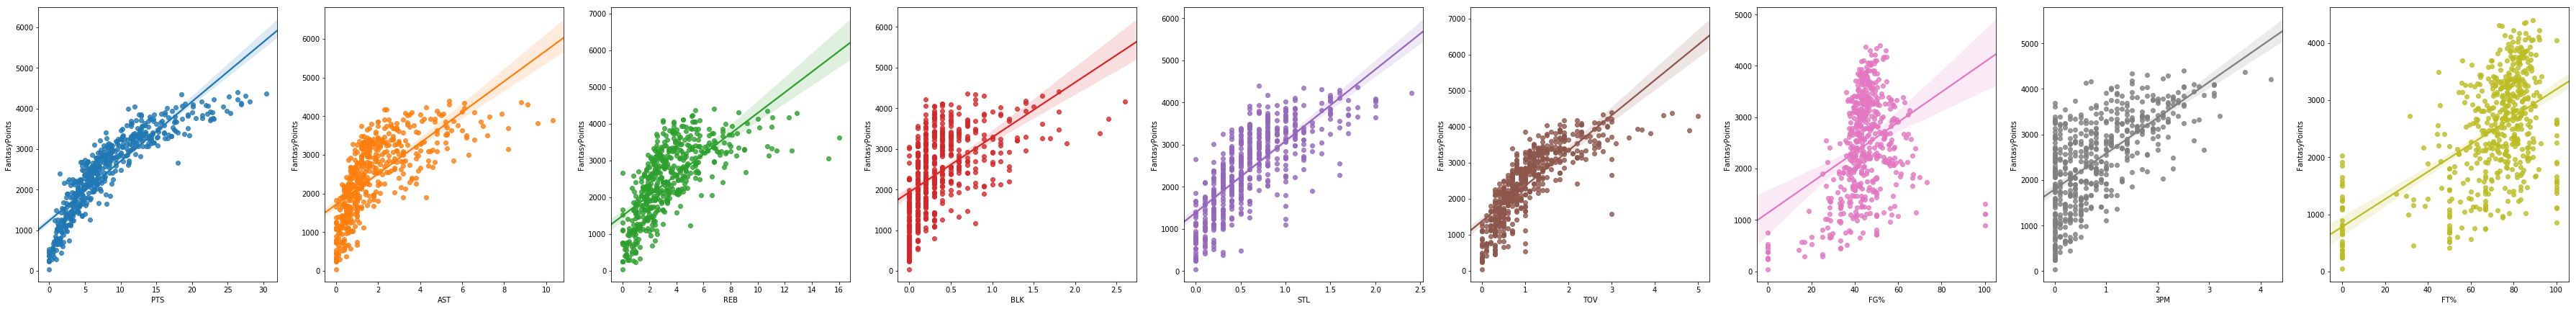

In [16]:
height = 7
width = len(categories) * height
fig, axs = plt.subplots(ncols=len(categories), figsize= (width, height))
for index, categorie in enumerate(categories):
    sns.regplot(x=df[categorie], y=df["FantasyPoints"], ax=axs[index])
    

In [25]:
df

,PLAYER,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,FantasyPoints,FantasyPoints%
6,Kevin Durant,68,49,19,34.2,26.4,9.3,18.0,51.6,2.5,...,3.0,0.7,1.8,2.0,47.0,15,2,5.2,5451.0,1.009
0,James Harden,72,59,13,35.4,30.4,9.0,20.1,44.9,3.7,...,4.4,1.8,0.7,2.3,53.0,31,4,7.3,5412.0,1.002
2,LeBron James,82,50,32,36.9,27.5,10.5,19.3,54.2,1.8,...,4.2,1.4,0.9,1.7,54.1,52,18,1.3,5384.0,0.997
8,DeMarcus Cousins,48,27,21,36.2,25.2,8.5,18.0,47.0,2.2,...,5.0,1.6,1.6,3.8,53.3,38,3,1.6,5354.0,0.991
36,Nikola Jokic,75,43,32,32.6,18.5,6.7,13.5,49.9,1.5,...,2.8,1.2,0.8,2.8,43.7,38,10,4.7,5319.0,0.985
23,Karl-Anthony Towns,82,47,35,35.6,21.3,7.8,14.3,54.5,1.5,...,1.9,0.8,1.4,3.5,44.3,68,0,4.5,5267.0,0.975
12,Victor Oladipo,75,48,27,34.0,23.1,8.5,17.9,47.7,2.1,...,2.9,2.4,0.8,2.3,42.3,3,0,4.5,5252.0,0.973
1,Anthony Davis,75,45,30,36.4,28.1,10.4,19.5,53.4,0.7,...,2.2,1.5,2.6,2.1,55.1,50,1,3.9,5230.0,0.969
3,Damian Lillard,73,44,29,36.6,26.9,8.5,19.4,43.9,3.1,...,2.8,1.1,0.4,1.6,43.6,11,0,4.7,5209.0,0.965
4,Giannis Antetokounmpo,75,39,36,36.7,26.9,9.9,18.7,52.9,0.6,...,3.0,1.5,1.4,3.1,51.7,42,1,2.0,5208.0,0.964
